In [17]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

import os
import numpy as np
from Custom import Mouse
import Hearis as h 

import settings as s
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
batch = s.Batch()

Processing files for mice 753564...
DISF_31012022_753562_2.DAT
DISF_02022022_753562_1.DAT
DISF_01022022_753562_1.DAT
DISF_31012022_753562_1.DAT
DISF_03022022_753562_2.DAT
DISF_03022022_753562_1.DAT
Processing files for mice 753572...
DISF_28012022_753572_2.DAT
DISF_31012022_753572_2.DAT
DISF_02022022_753572_1.DAT
DISF_03022022_753572_1.DAT
DISF_28012022_753572_1.DAT
DISF_03022022_753572_2.DAT
DISF_01022022_753572_1.DAT
DISF_31012022_753572_1.DAT
Processing files for mice 753573...
DISF_31012022_753573_1.DAT
DISF_02022022_753573_1.DAT
DISF_03022022_753573_1.DAT
DISF_01022022_753573_1.DAT


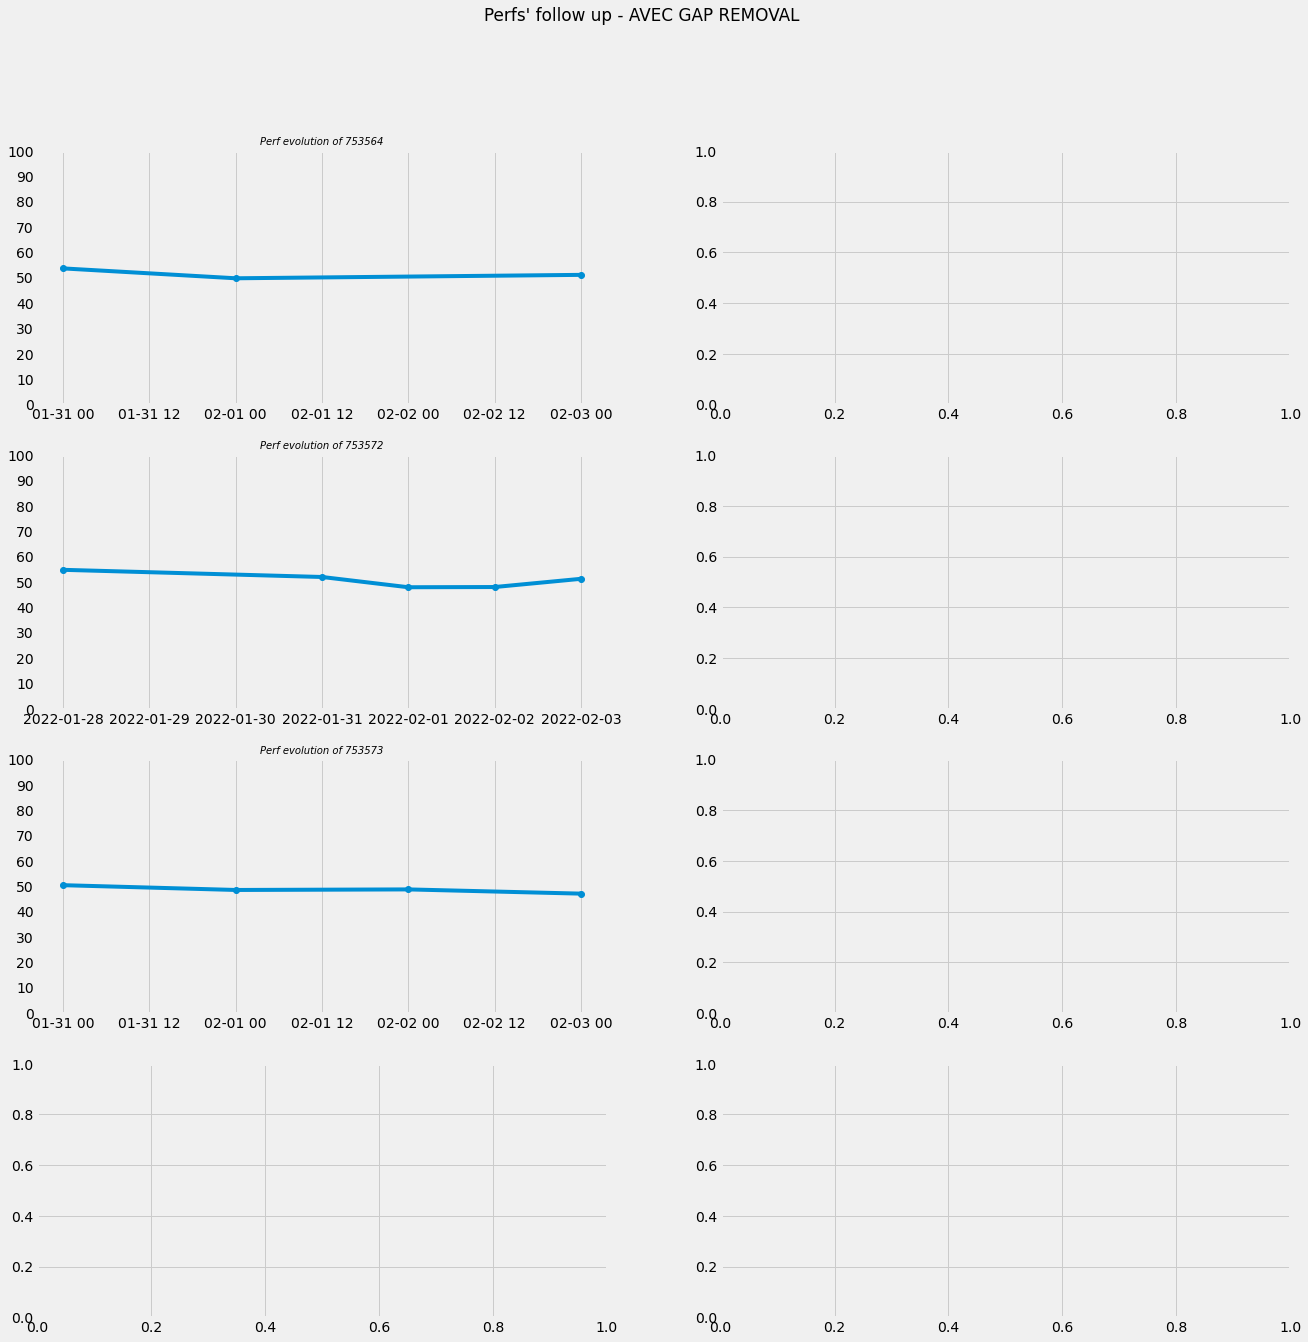

In [24]:
mice_id = batch.id_first_dlp
mice = [Mouse(path='/home/anverdie/share/gaia/Data/Optogenetic/DLP/{}'.format(i), tag=['DISF'], blank=True, dlp=True, rmgaps='Antonin', linkday=True, verbose=True) for i in mice_id]
h.all_perfs(mice, blank=True)


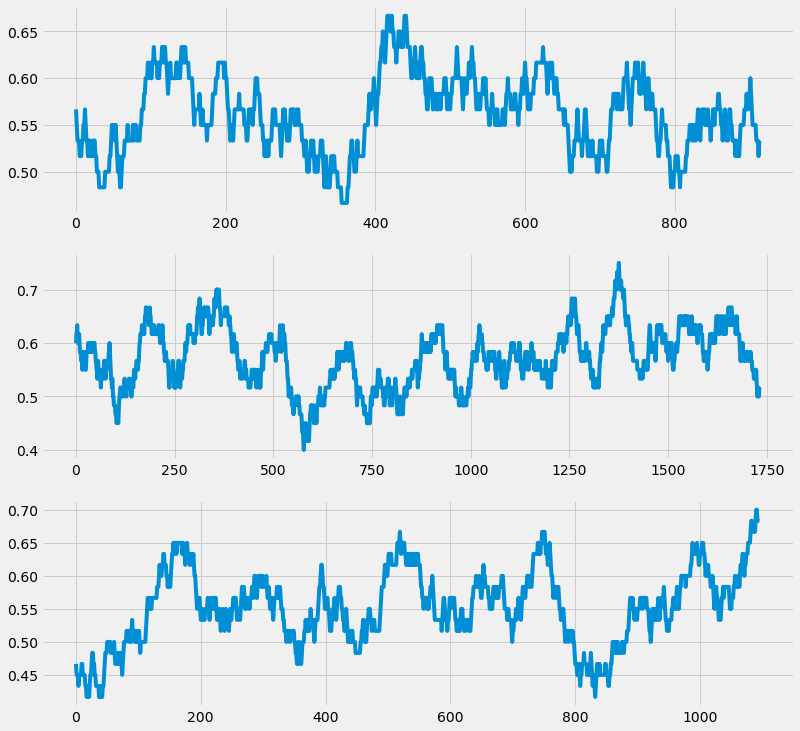

In [26]:

sf = 60

fig, axs = plt.subplots(3, figsize=(12, 12))
for i, mouse in enumerate(mice):
    corr = np.concatenate([np.array(f.tr_corr) for f in mouse.elphy])
    conv_corr = np.convolve(corr, np.ones(sf)/sf, mode='valid')
    axs[i].plot(conv_corr)
    
    
    

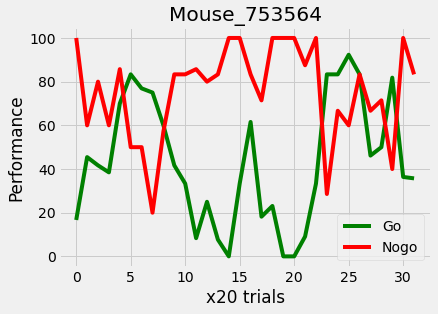

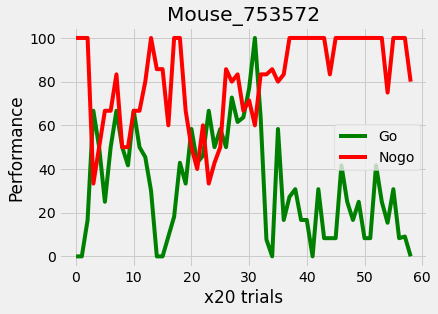

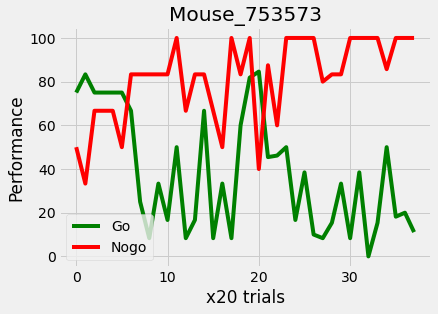

In [27]:
for mouse in mice:
    ta_type = [f.ta_type for f in mouse.elphy]
    ttype = [f.tr_type for f in mouse.elphy]
    tcorr = [f.tr_corr for f in mouse.elphy]
    ttype = [t[:len(c)] for t, c in zip(ttype, tcorr)]
    ttype = np.concatenate(ttype)
    tcorr = np.concatenate(tcorr)

    task = ttype*tcorr

    sf = 30
    blocks = [ttype[i*sf:(i+1)*sf] for i in range(int(len(ttype)/sf))]
    corr_blocks = [tcorr[i*sf:(i+1)*sf] for i in range(int(len(tcorr)/sf))]

    go = []
    nogo = []
    for i, b in enumerate(blocks):
        idx_gos = np.where(b == 2)[0]
        idx_nogos = np.where(b == 1)[0]
        if len(idx_gos) > 0:
            go.append(np.sum(corr_blocks[i][idx_gos])*100/len(idx_gos))
            nogo.append(np.sum(corr_blocks[i][idx_nogos])*100/len(idx_nogos))
    plt.plot(go, c='green', label='Go')
    plt.plot(nogo, c='red', label='Nogo')
    plt.legend()
    plt.tight_layout()
    plt.xlabel('x20 trials')
    plt.ylabel('Performance')
    plt.title('Mouse_{}'.format(mouse.ID))
    plt.savefig('{}.png'.format(mouse.ID), dpi=250)
    plt.show()

        
    
    

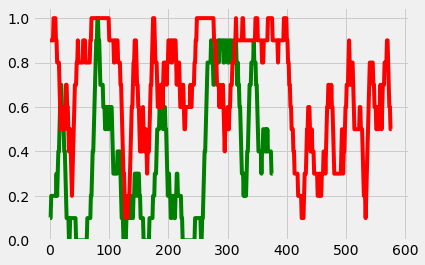

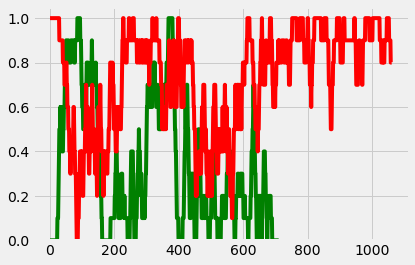

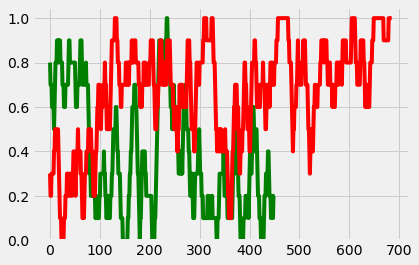

In [29]:
    smoothness = 10
    for mouse in mice:
        ta_type = np.concatenate([np.array(f.ta_type) for f in mouse.elphy])
        tr_corr = np.concatenate([np.array(f.tr_corr) for f in mouse.elphy])
        
        gos = [c for c, t in zip(tr_corr, ta_type) if t == 1]
        nogos = [c for c, t in zip(tr_corr, ta_type) if t == 2]

        conv_gos = np.convolve(gos, np.ones(smoothness)/smoothness, mode='valid')
        conv_nogos = np.convolve(nogos, np.ones(smoothness)/smoothness, mode='valid')

        plt.plot(conv_gos, c='green')
        plt.plot(conv_nogos, c='red')
        plt.ylim((0, 1.05))
        plt.show()